In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools


# Función de optimización de DBSCAN

El siguiente codigo define una funcion que permite poner a prueba muchos modelos de DBSCAN con distintos parametros y calcular su score de silhouette para hallar la combinacion de parametros que devuelve el modelo con score maximo. 

Primero especificamos las combinaciones de epsilon y min_sample que queremos probar.  

In [3]:
epsilons = np.linspace(0.01, 1, num=30)
epsilons

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [4]:
min_samples = np.arange(2, 20, step=1)
min_samples

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [5]:

combinations = list(itertools.product(epsilons, min_samples))

In [10]:
type(min_samples)

numpy.ndarray

Cantidad de combinaciones de parametros que se van a probar:

In [13]:
N = len(combinations)
print(f"Se pondran a prueba {N} combinaciones de {len(epsilons)} valores de epsilon y {len(min_samples)} valores de min_samples.")

Se pondran a prueba 540 combinaciones de 30 valores de epsilon y 18 valores de min_samples.


Definimos la funcion:

In [14]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}



# De que fuentes proviene la electricad que consumimos?

# MODELO NO SUPERVISADO

In [15]:
df = pd.read_csv(r"../datasets/wec_ns.csv")
df.head(5)

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,acceso_elec
0,Afghanistan,34.247333,83.543444,16.456556,83.543444,0.0,5.156111,31.813000,Asia,AFG,97.70000
1,Albania,2.896444,99.851444,0.148556,99.851444,0.0,2.103889,1998.432000,Europa,ALB,100.00000
2,Algeria,39.784222,0.766333,99.233667,0.766333,0.0,1568.103333,1580.157222,África,DZA,99.80413
3,Angola,27.940556,65.673556,34.326444,65.673556,0.0,110.650000,326.007889,África,AGO,46.89061
4,Antigua and Barbuda,0.093444,1.572000,98.428000,1.572000,0.0,3415.806889,3470.763111,Norteamérica,ATG,100.00000


In [16]:
features4 = ["fossil_share_elec", "renewables_share_elec","nuclear_share_elec"]
X4 = df[features4]
X4.head(5)

,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,16.456556,83.543444,0.0
1,0.148556,99.851444,0.0
2,99.233667,0.766333,0.0
3,34.326444,65.673556,0.0
4,98.428000,1.572000,0.0


In [17]:
pd.DataFrame(X4).head(5)

,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,16.456556,83.543444,0.0
1,0.148556,99.851444,0.0
2,99.233667,0.766333,0.0
3,34.326444,65.673556,0.0
4,98.428000,1.572000,0.0


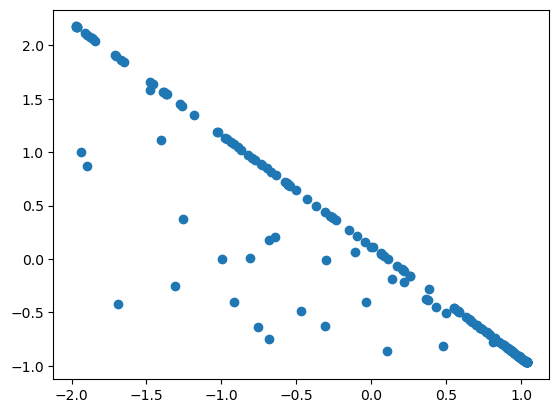

In [18]:
X4_scaled = StandardScaler().fit_transform(X4)

plt.scatter(X4_scaled[:, 0], X4_scaled[:, 1])

In [19]:
best_dict4 = get_scores_and_labels(combinations, X4_scaled)

Index: 0, Score: 0.0928440816972184, Labels: [-1  0  1 -1  2 -1 -1  3  3 -1 -1  1  1  2  2  2 -1  4  5  1  0 -1 -1  1
 -1  1  1 -1  6  7 -1 -1 -1  1  4  2 -1 -1 -1  5  8 -1 -1 -1 -1 -1  0 -1
  1  9 -1 -1 -1 -1 10  5  3  0 11 -1 -1 -1 -1 -1  1 12 -1 11 13  7  2 -1
  2 -1 14  2  2  6 -1  1 -1  0 -1 -1 -1 -1 -1  2 -1 15 -1 16 17 12 17  1
 18 -1 -1  5  0  1  1 -1 -1 18 19  1 -1 20  5 -1 -1 -1 -1 -1  1  6 -1 -1
  1 -1  6 12 14  2  1 -1 -1  1 -1  1 -1 10 -1 13 -1 16  1 -1 -1 -1  1  5
  1  2  6 -1 15  1  8 -1  1 21  5 -1 -1 -1  5 -1  1 -1 -1 21 -1 -1 -1 20
 -1 -1 -1 19 -1  1  1  5  9  1  1 -1 -1  1], NumClusters: 22
Index: 1, Score: -0.06972358150089025, Labels: [-1  0  1 -1  2 -1 -1  3  3 -1 -1  1  1  2  2  2 -1 -1  4  1  0 -1 -1  1
 -1  1  1 -1  5 -1 -1 -1 -1  1 -1  2 -1 -1 -1  4 -1 -1 -1 -1 -1 -1  0 -1
  1 -1 -1 -1 -1 -1 -1  4  3  0 -1 -1 -1 -1 -1 -1  1  6 -1 -1 -1 -1  2 -1
  2 -1 -1  2  2  5 -1  1 -1  0 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  6 -1  1
 -1 -1 -1  4  0  1  1 -1 -1 -1 -1  1 -1 -1  

In [20]:
best_dict4

{'best_epsilon': 0.4537931034482759,
 'best_min_samples': 19,
 'best_labels': array([ 2,  2,  0,  1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
         2,  0,  0,  2,  0,  0,  0,  2,  0,  0, -1,  0,  2,  0,  1, -1,  0,
         2,  0,  0,  0, -1,  0,  0,  2,  1,  0,  0, -1,  2,  1,  0,  0,  0,
         1,  0,  1,  0,  0,  0,  2,  1, -1, -1,  1,  0,  0,  0,  2, -1,  1,
         0,  2,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0, -1,  2,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  2,  2,  1,  0,  2,  0,
         0,  1,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,
         2,  0,  0,  0,  2,  1,  0,  0, -1,  2,  0, -1,  0,  1,  0,  1,  0,
         1,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0, -1, -1,  0,  0, -1,  0, -1,  0,  1,  0, -1, -1,  0, -1,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  2, -1,  0], dtype=int64),
 'best_score': 0.5741673489520047}

In [21]:
df['cluster4'] = best_dict4['best_labels']

df['cluster4'].value_counts()

cluster4
 0    112
 2     24
 1     23
-1     23
Name: count, dtype: int64

In [28]:
cluster0 = df.loc[df["cluster4"] == 0, "country"]
cluster0

2                               Algeria
4                   Antigua and Barbuda
5                             Argentina
7                                 Aruba
8                             Australia
10                           Azerbaijan
11                              Bahamas
12                              Bahrain
13                           Bangladesh
14                             Barbados
15                              Belarus
18                                Benin
19                              Bermuda
21                              Bolivia
22               Bosnia and Herzegovina
23                             Botswana
25               British Virgin Islands
26                               Brunei
28                         Burkina Faso
30                             Cambodia
33                       Cayman Islands
35                                 Chad
36                                Chile
37                                China
39                              Comoros


In [29]:
cluster1 = df.loc[df["cluster4"] == 1, "country"]
cluster1

3             Angola
31          Cameroon
42           Croatia
47           Denmark
51           Ecuador
53       El Salvador
58              Fiji
61     French Guiana
67             Ghana
73         Guatemala
74            Guinea
78          Honduras
98            Latvia
103        Lithuania
108             Mali
115       Montenegro
124        Nicaragua
132           Panama
134             Peru
136         Portugal
141           Rwanda
153     Sierra Leone
163            Sudan
Name: country, dtype: object

In [31]:
cluster2 = df.loc[df["cluster4"] == 2, "country"]
cluster2

0                       Afghanistan
1                           Albania
17                           Belize
20                           Bhutan
24                           Brazil
29                          Burundi
34         Central African Republic
41                       Costa Rica
46     Democratic Republic of Congo
57                         Ethiopia
65                          Georgia
69                        Greenland
81                          Iceland
93                            Kenya
96                       Kyrgyzstan
97                             Laos
100                         Lesotho
105                          Malawi
118                      Mozambique
119                         Namibia
123                     New Zealand
128                          Norway
169                      Tajikistan
179                          Uganda
Name: country, dtype: object

In [30]:
ruido = df.loc[df["cluster4"] == -1, "country"]
ruido

6          Armenia
9          Austria
16         Belgium
27        Bulgaria
32          Canada
38        Colombia
45         Czechia
59         Finland
60          France
66         Germany
80         Hungary
127    North Korea
130       Pakistan
139        Romania
140         Russia
155       Slovakia
156       Slovenia
159    South Korea
161          Spain
165         Sweden
166    Switzerland
168         Taiwan
180        Ukraine
Name: country, dtype: object

In [32]:
fig = px.scatter(x=df["fossil_share_elec"], y=df["renewables_share_elec"], color=df['cluster4'])
fig.show()

In [33]:
fig = px.scatter(x=df["nuclear_share_elec"], y=df["renewables_share_elec"], color=df['cluster4'])
fig.show()

In [34]:
df_ruido = df[df["cluster4"] == -1]

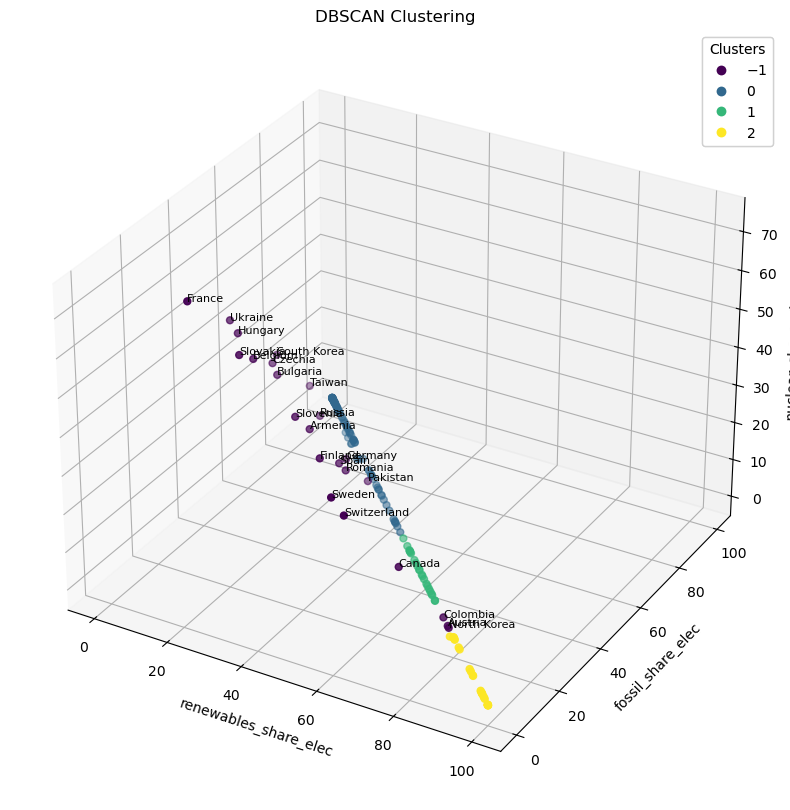

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que tienes un DataFrame llamado df con la columna 'country'
# Asegúrate de tener la columna 'country' en tu DataFrame

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['renewables_share_elec'], df['fossil_share_elec'], df['nuclear_share_elec'],
                     c=df['cluster4'], cmap='viridis', s=25)

# Iterar a través de cada punto y agregar el texto correspondiente
for country, x, y, z in zip(df_ruido['country'], df_ruido['renewables_share_elec'], df_ruido['fossil_share_elec'], df_ruido['nuclear_share_elec']):
    ax.text(x, y, z, country, fontsize=8)

ax.set_xlabel('renewables_share_elec')
ax.set_ylabel('fossil_share_elec')
ax.set_zlabel('nuclear_share_elec')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [36]:
df.sort_values("nuclear_share_elec")

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,acceso_elec,cluster4
0,Afghanistan,34.247333,83.543444,16.456556,83.543444,0.000000,5.156111,31.813000,Asia,AFG,97.700000,2
109,Malta,0.431444,7.095200,92.904800,7.095200,0.000000,4063.425000,4326.912800,Europa,MLT,98.100000,0
110,Martinique,0.381000,2.797778,97.202222,2.797778,0.000000,3735.487222,3846.745111,Norteamérica,MTQ,100.000000,0
111,Mauritius,1.259778,21.802111,78.197889,21.802111,0.000000,1760.876778,2251.881444,África,MUS,100.000000,0
113,Moldova,4.066111,6.086444,93.913556,6.086444,0.000000,1197.070444,1273.847889,Europa,MDA,56.258694,0
114,Mongolia,2.997778,4.853800,95.146200,4.853800,0.000000,1688.058700,1778.117200,Asia,MNG,100.000000,0
115,Montenegro,0.626889,55.749444,44.250556,55.749444,0.000000,2162.070222,5001.308222,Europa,MNE,89.900000,1
116,Montserrat,0.005000,0.000000,100.000000,0.000000,0.000000,3925.925889,3925.925889,Norteamérica,MSR,100.000000,0
117,Morocco,34.644889,15.340222,84.659778,15.340222,0.000000,697.677111,827.142556,África,MAR,100.000000,0
118,Mozambique,27.142333,90.126111,9.873889,90.126111,0.000000,59.980444,620.169667,África,MOZ,100.000000,2


In [37]:
suram = df[df["continente"] == "Sudamérica"]

In [38]:
suram.sort_values("nuclear_share_elec")

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code,acceso_elec,cluster4
21,Bolivia,10.866778,31.721000,68.279000,31.721000,0.0000,529.824700,775.388700,Sudamérica,BOL,97.55412,0
36,Chile,18.032667,43.702900,56.297100,43.702900,0.0000,2255.461200,4013.349500,Sudamérica,CHL,100.00000,0
38,Colombia,47.756444,73.789700,26.210300,73.789700,0.0000,394.952700,1493.816900,Sudamérica,COL,86.73714,-1
51,Ecuador,16.258111,61.819111,38.180889,61.819111,0.0000,577.502889,1545.639778,Sudamérica,ECU,100.00000,1
61,French Guiana,0.262667,60.394333,39.605667,60.394333,0.0000,1485.467778,3751.233333,Sudamérica,GUF,100.00000,1
76,Guyana,0.767111,2.016000,97.984000,2.016000,0.0000,1270.138111,1296.136556,Sudamérica,GUY,100.00000,0
134,Peru,30.663889,57.749400,42.250600,57.749400,0.0000,640.518200,1520.790700,Sudamérica,PER,100.00000,1
164,Suriname,0.558667,44.775778,55.224222,44.775778,0.0000,1888.589889,3406.356556,Sudamérica,SUR,100.00000,0
24,Brazil,204.398891,83.532800,16.467200,80.964000,2.5686,460.626300,2791.120400,Sudamérica,BRA,100.00000,2
5,Argentina,43.063444,29.966300,70.033700,24.956500,5.0098,2166.508200,3092.054700,Sudamérica,ARG,100.00000,0


Since transport and heating tend to be harder to decarbonize – they are more reliant on oil and gas – renewables tend to have a higher share in the electricity mix versus the total energy mix.